# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# 1- There is a correlation between Maximum Temperature which increase towards the center and vice versa 
# 2- there is high Humidity in the norhern hemishpere compared to the center and southern hemisphere
# 3- There is no correlation between wind speed and logitude but interestingly there more clustered cities
# in the northern hemisphere.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# URL & UNIT
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

# Empty lists to hold variables
city_name = []
country = []
latitude = []
longitude = []
temp = []
temp_max = []
humidity = []
wind_speed = []
date = []
cloudiness = []
count = 0
sets = 1

In [9]:
# loop through cities list
print("Beginning Data Retrieval\n"
      "-----------------------------\n")
# for loop through each city 
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        count += 1
        
        if count % 50  == 0: 
        
            sets = sets + 1
            time.sleep(2)
            
        print(f"Processing Record {count} of Set {sets} | {city}")
    except:
        print("City not found. Skipping...")
        pass                       
print("-----------------------------\n"
      "Data Retrieval Complete\n"
      "-----------------------------\n")       
    
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | jiuquan
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | usolye
Processing Record 11 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | te anau
City not found. Skipping...
Processing Record 14 of Set 1 | sokoto
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | celestun
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | castro
Processing Record 22 of 

Processing Record 185 of Set 4 | roald
Processing Record 186 of Set 4 | berdigestyakh
Processing Record 187 of Set 4 | ugoofaaru
Processing Record 188 of Set 4 | jiangkou
Processing Record 189 of Set 4 | akureyri
Processing Record 190 of Set 4 | camopi
Processing Record 191 of Set 4 | muravlenko
Processing Record 192 of Set 4 | thaba nchu
Processing Record 193 of Set 4 | fortuna
Processing Record 194 of Set 4 | antofagasta
Processing Record 195 of Set 4 | nsoko
Processing Record 196 of Set 4 | dawlatabad
Processing Record 197 of Set 4 | sao joao da barra
Processing Record 198 of Set 4 | sassandra
Processing Record 199 of Set 4 | yellowknife
Processing Record 200 of Set 5 | vao
Processing Record 201 of Set 5 | pisco
Processing Record 202 of Set 5 | waterlooville
Processing Record 203 of Set 5 | kaitangata
Processing Record 204 of Set 5 | bogorodskoye
Processing Record 205 of Set 5 | porto san giorgio
Processing Record 206 of Set 5 | clyde river
Processing Record 207 of Set 5 | westport


Processing Record 370 of Set 8 | blagoyevo
Processing Record 371 of Set 8 | flinders
Processing Record 372 of Set 8 | khandyga
City not found. Skipping...
Processing Record 373 of Set 8 | yamada
Processing Record 374 of Set 8 | kenmare
Processing Record 375 of Set 8 | iqaluit
Processing Record 376 of Set 8 | weston-super-mare
Processing Record 377 of Set 8 | el alto
Processing Record 378 of Set 8 | zhaotong
Processing Record 379 of Set 8 | varna
City not found. Skipping...
Processing Record 380 of Set 8 | dunedin
Processing Record 381 of Set 8 | altepexi
Processing Record 382 of Set 8 | pucallpa
Processing Record 383 of Set 8 | san cristobal
Processing Record 384 of Set 8 | acapulco
Processing Record 385 of Set 8 | beringovskiy
Processing Record 386 of Set 8 | micheweni
Processing Record 387 of Set 8 | mayo
Processing Record 388 of Set 8 | robertsport
Processing Record 389 of Set 8 | latung
Processing Record 390 of Set 8 | tezu
Processing Record 391 of Set 8 | ayr
Processing Record 392

Processing Record 548 of Set 11 | flin flon
Processing Record 549 of Set 11 | marawi
City not found. Skipping...
Processing Record 550 of Set 12 | mumford
Processing Record 551 of Set 12 | gillette
Processing Record 552 of Set 12 | kaduy
Processing Record 553 of Set 12 | lakatoro
Processing Record 554 of Set 12 | abha
Processing Record 555 of Set 12 | ulladulla
Processing Record 556 of Set 12 | gorontalo
Processing Record 557 of Set 12 | bend
Processing Record 558 of Set 12 | clinton
Processing Record 559 of Set 12 | fecamp
Processing Record 560 of Set 12 | meylan
Processing Record 561 of Set 12 | salisbury
-----------------------------
Data Retrieval Complete
-----------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# convert into a DataFrame:

city_data = pd.DataFrame({"City": city_name, "Latitude": latitude, "Longitude": longitude, 
                           "Temperature": temp, "Temp_max": temp_max, 
                          "Humidity": humidity, "cloudiness": cloudiness, 
                          "Wind Speed": wind_speed, "Country": country, "Date": date})
# import to csv
city_data.to_csv("/users/amralwakeal/Desktop/city_data.csv", encoding="utf-8", index=False)
# Display DataFrame:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         561 non-null    object 
 1   Latitude     561 non-null    float64
 2   Longitude    561 non-null    float64
 3   Temperature  561 non-null    float64
 4   Temp_max     561 non-null    float64
 5   Humidity     561 non-null    int64  
 6   cloudiness   561 non-null    int64  
 7   Wind Speed   561 non-null    float64
 8   Country      561 non-null    object 
 9   Date         561 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 44.0+ KB


In [11]:
city_data.sort_values(by='Humidity', ascending=False)

,City,Latitude,Longitude,Temperature,Temp_max,Humidity,cloudiness,Wind Speed,Country,Date
323,Talnakh,69.49,88.40,44.60,44.60,100,90,20.13,RU,1601153867
386,Mayo,38.89,-76.51,69.67,71.01,100,90,4.70,US,1601153663
514,Aykhal,66.00,111.50,26.60,26.60,100,0,6.71,RU,1601153904
288,Inuvik,68.35,-133.72,35.60,35.60,100,90,10.29,CA,1601153860
224,Bereda,43.27,-7.54,58.68,60.01,100,100,5.99,ES,1601153849
...,...,...,...,...,...,...,...,...,...,...
85,Saint George,37.10,-113.58,91.26,93.99,10,1,4.70,US,1601153586
292,Salta,-24.79,-65.41,98.60,98.60,9,1,9.17,AR,1601153861
247,Adrar,20.50,-10.07,99.45,99.45,9,0,11.92,MR,1601153852
516,Taoudenni,22.68,-3.98,99.32,99.32,9,0,5.14,ML,1601153904


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
#### There is no city with Humidity over 100%

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

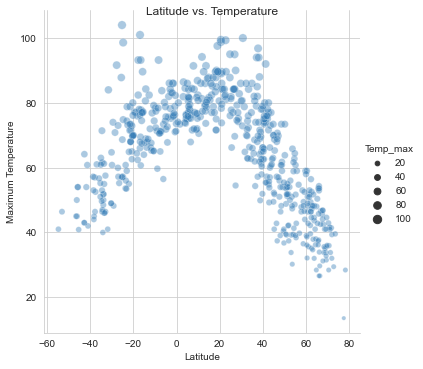

In [12]:
# Plotting Latitude vs Maximum Temperature

sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
g = sns.relplot(x='Latitude', y='Temp_max', data=city_data, kind='scatter', size='Temp_max', alpha=0.4)
g.fig.suptitle('Latitude vs. Temperature')
g.set(xlabel='Latitude', ylabel='Maximum Temperature')


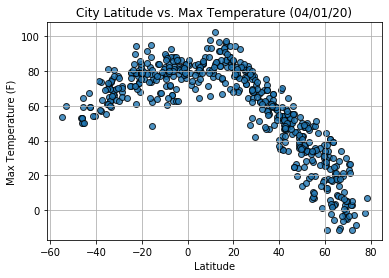

## Latitude vs. Humidity Plot

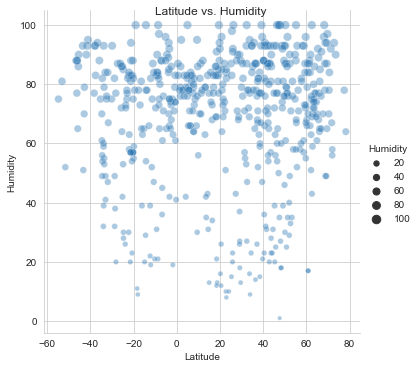

In [37]:
# Plotting Latitude vs Humidity:
sns.set_style('whitegrid')
sns.color_palette("rocket_r", as_cmap=True)
g = sns.relplot(x='Latitude', y='Humidity', data=city_data, kind='scatter', size='Humidity', alpha=0.4)
g.fig.suptitle('Latitude vs. Humidity')
g.set(xlabel='Latitude', ylabel='Humidity')


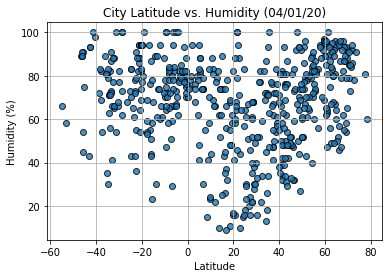

## Latitude vs. Cloudiness Plot

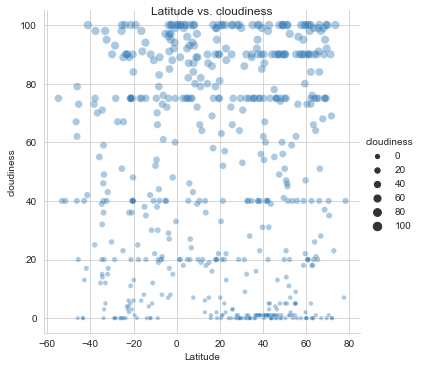

In [36]:
# Plotting Latitude vs Cloudness
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
g = sns.relplot(x='Latitude', y='cloudiness', data=city_data, kind='scatter', size='cloudiness', alpha=0.4)
g.fig.suptitle('Latitude vs. cloudiness')
g.set(xlabel='Latitude', ylabel='cloudiness')


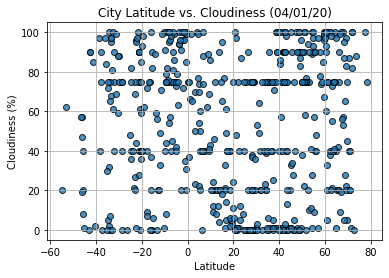

## Latitude vs. Wind Speed Plot

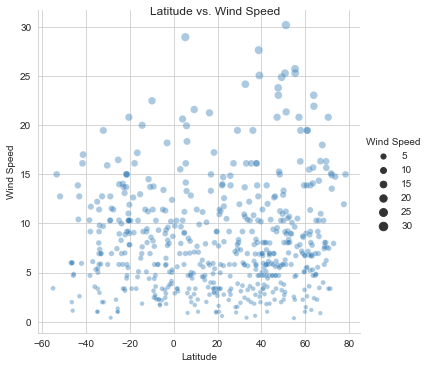

In [40]:
# Plotting Latitude vs Cloudness
sns.set_style('whitegrid')
sns.color_palette("rocket_r", as_cmap=True)
g = sns.relplot(x='Latitude', y='Wind Speed', data=city_data, kind='scatter', size='Wind Speed', alpha=0.4)
g.fig.suptitle('Latitude vs. Wind Speed')
g.set(xlabel='Latitude', ylabel='Wind Speed')

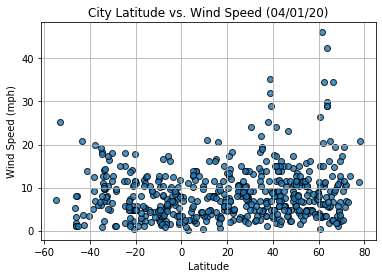

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
# create linear regression function taking x & y values => scatter, equation, print r squared

def linear_regression(x_values, y_values):
    
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    g = plt.annotate(line_eq,(19,25),fontsize=15,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    eq = print(f"The r-squared is: {rvalue**2}")
    return (g, eq)

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_data[city_data['Latitude'] > 0]
south_df = city_data[city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6864980819133453


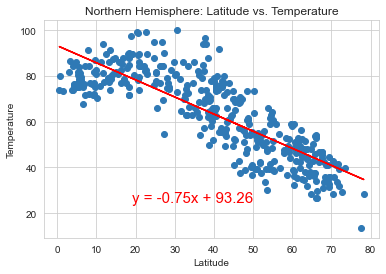

In [15]:
linear_regression(north_df['Latitude'], north_df['Temp_max'])
plt.title('Northern Hemisphere: Latitude vs. Temperature')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

The r-squared is: 0.8271188905041935


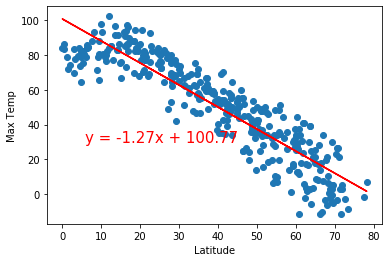

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4660630015319092


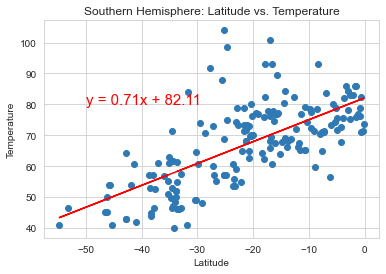

In [22]:
x_values = south_df['Latitude']
y_values = south_df['Temp_max']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere: Latitude vs. Temperature')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

The r-squared is: 0.39936284758885965


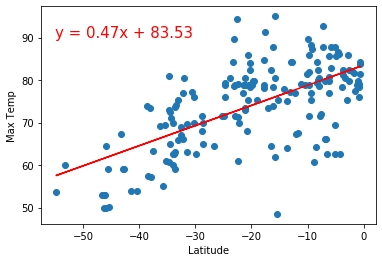

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00107317151710189


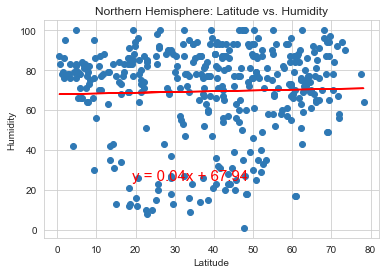

In [199]:
linear_regression(north_df['Latitude'], north_df['Humidity'])

plt.title('Northern Hemisphere: Latitude vs. Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.7096765884512803e-05


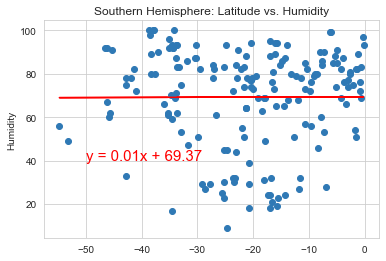

In [24]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere: Latitude vs. Humidity')
plt.ylabel("Humidity")
plt.show()

The r-squared is: 0.0008996079328825663


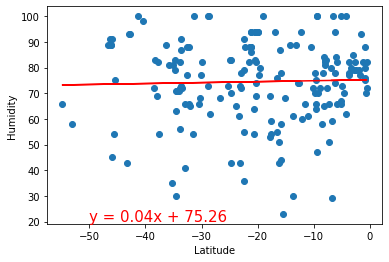

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005480338210361406


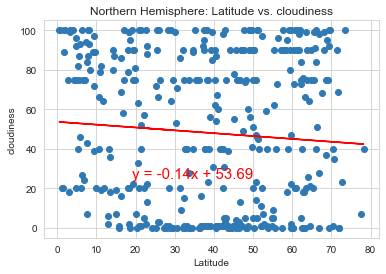

In [201]:
linear_regression(north_df['Latitude'], north_df['cloudiness'])

plt.title('Northern Hemisphere: Latitude vs. cloudiness')
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.show()

The r-squared is: 0.05768812657005063


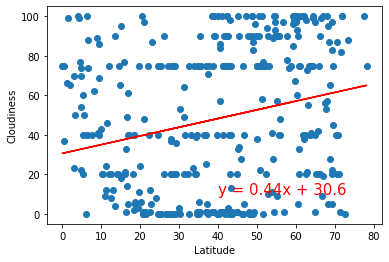

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0026263681038864307


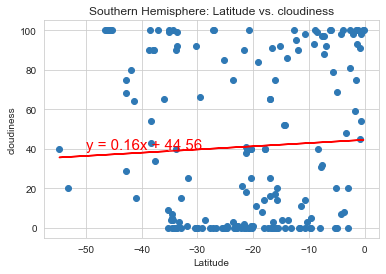

In [25]:
x_values = south_df['Latitude']
y_values = south_df['cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title('Southern Hemisphere: Latitude vs. cloudiness')
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.show()

The r-squared is: 0.0684912094859049


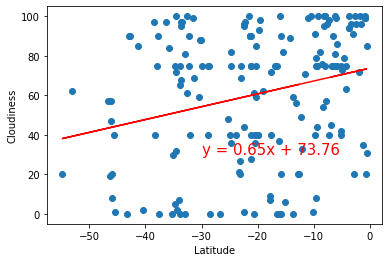

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014858524799813515


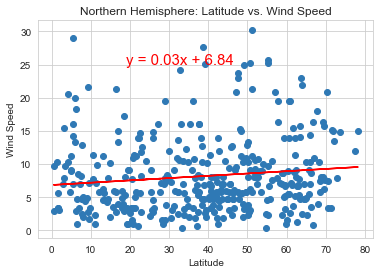

In [203]:
linear_regression(north_df['Latitude'], north_df['Wind Speed'])

plt.title('Northern Hemisphere: Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-squared is: 0.023371104533850804


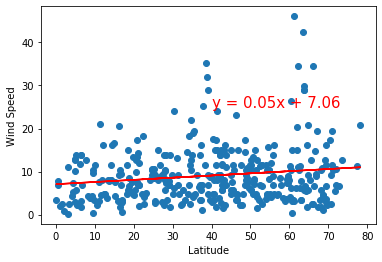

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10548994480760045


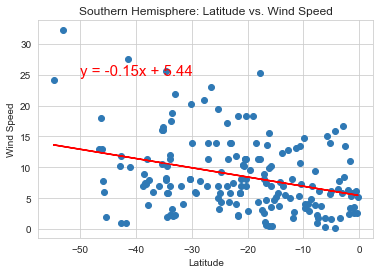

In [27]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")


plt.title('Southern Hemisphere: Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-squared is: 0.03381889207758188


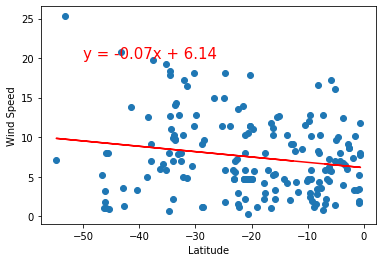